Accuracy: 96.67%


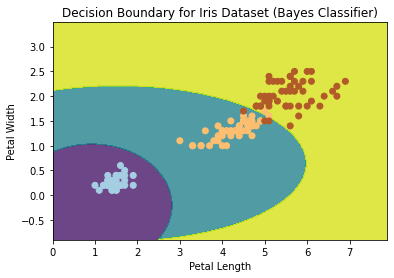

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, 2:4], iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = [], [], [], []

for class_label in np.unique(y):
    class_indices = np.where(y == class_label)[0]
    X_class = X[class_indices]
    y_class = y[class_indices]
    
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
        X_class, y_class, test_size=10, random_state=42)
    
    X_train.extend(X_train_class)
    X_test.extend(X_test_class)
    y_train.extend(y_train_class)
    y_test.extend(y_test_class)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define the Gaussian Naive Bayes Classifier
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0)
            self.prior[c] = len(X_c) / len(X)

    def predict(self, X):
        predictions = []

        for x in X:
            posteriors = []

            for c in self.classes:
                prior = np.log(self.prior[c])
                likelihood = np.sum(np.log(self.pdf(c, x)))
                posterior = prior + likelihood
                posteriors.append(posterior)

            predictions.append(self.classes[np.argmax(posteriors)])

        return np.array(predictions)

    def pdf(self, class_label, x):
        mean = self.mean[class_label]
        var = self.var[class_label]
        num = np.exp(-(x - mean) ** 2 / (2 * var))
        den = np.sqrt(2 * np.pi * var)
        return num / den

# Create and fit the Gaussian Naive Bayes classifier
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary for Iris Dataset (Bayes Classifier)')
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# importing the dataset
df = pd.read_csv("iris.csv")
df = df.drop(["Id"],axis=1)
for i in df['Species'].unique():
    df_train = pd.concat([df_train, df[df['Species'] == i].iloc[:40]],ignore_index=True)
    df_test = pd.concat([df_test, df[df['Species'] == i].iloc[40:]],ignore_index=True)
df=np.array(df)
y_train=df_train["Species"]
X_train=df_train.drop(["Species"],axis=1)
y_test=df_test["Species"]
X_test=df_test.drop(["Species"],axis=1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate the mean and variance for each feature in each class
classes = np.unique(y)
mean = {}
var = {}
prior = {}

for c in classes:
    X_c = X_train[y_train == c]
    mean[c] = np.mean(X_c, axis=0)
    var[c] = np.var(X_c, axis=0)
    prior[c] = len(X_c) / len(X_train)

# Define the predict function
def predict(X):
    predictions = []

    for x in X:
        posteriors = []

        for c in classes:
            prior_prob = np.log(prior[c])
            likelihood_prob = np.sum(np.log(pdf(c, x)))
            posterior_prob = prior_prob + likelihood_prob
            posteriors.append(posterior_prob)

        predictions.append(classes[np.argmax(posteriors)])

    return np.array(predictions)

# Define the probability density function (PDF)
def pdf(class_label, x):
    mean_c = mean[class_label]
    var_c = var[class_label]
    num = np.exp(-(x - mean_c) ** 2 / (2 * var_c))
    den = np.sqrt(2 * np.pi * var_c)
    return num / den

# Make predictions on the test set
y_pred = predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary for Iris Dataset (Bayes Classifier)')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

# Importing the dataset from the CSV file
df = pd.read_csv("iris.csv")
df = df.drop(["Id"], axis=1)

# Separate the data into training and test sets
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for species in df['Species'].unique():
    df_train = pd.concat([df_train, df[df['Species'] == species].iloc[:40]], ignore_index=True)
    df_test = pd.concat([df_test, df[df['Species'] == species].iloc[40:]], ignore_index=True)

X_train = df_train.drop(["Species"], axis=1).values
y_train = df_train["Species"].values
X_test = df_test.drop(["Species"], axis=1).values
y_test = df_test["Species"].values

# Calculate the mean and variance for each feature in each class
classes = np.unique(y_train)
mean = {}
var = {}
prior = {}

for c in classes:
    X_c = X_train[y_train == c]
    mean[c] = np.mean(X_c, axis=0)
    var[c] = np.var(X_c, axis=0)
    prior[c] = len(X_c) / len(X_train)

# Define the predict function
def predict(X):
    predictions = []

    for x in X:
        posteriors = []

        for c in classes:
            prior_prob = np.log(prior[c])
            likelihood_prob = np.sum(np.log(pdf(c, x)))
            posterior_prob = prior_prob + likelihood_prob
            posteriors.append(posterior_prob)

        predictions.append(classes[np.argmax(posteriors)])

    return np.array(predictions)

# Define the probability density function (PDF)
def pdf(class_label, x):
    mean_c = mean[class_label]
    var_c = var[class_label]
    x = np.array(x)  # Convert x to a NumPy array
    num = np.exp(-np.sum((x - mean_c) ** 2 / (2 * var_c)))
    den = (2 * np.pi) ** (len(x) / 2) * np.sqrt(np.prod(var_c))
    return num / den

# Make predictions on the test set
y_pred = predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary for Iris Dataset (Bayes Classifier)')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'